In [136]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd   

from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [137]:
# download & read data

headerList = ['fixed acidity' ,'volatile acidity', 'citric acid',"residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
data = pd.read_csv('winequality-red-1.csv', sep=";",header=None, names = headerList)
data = data[1:]
#Creating X and y
X = data.loc[:, 'fixed acidity':'alcohol']
y = data['quality']

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


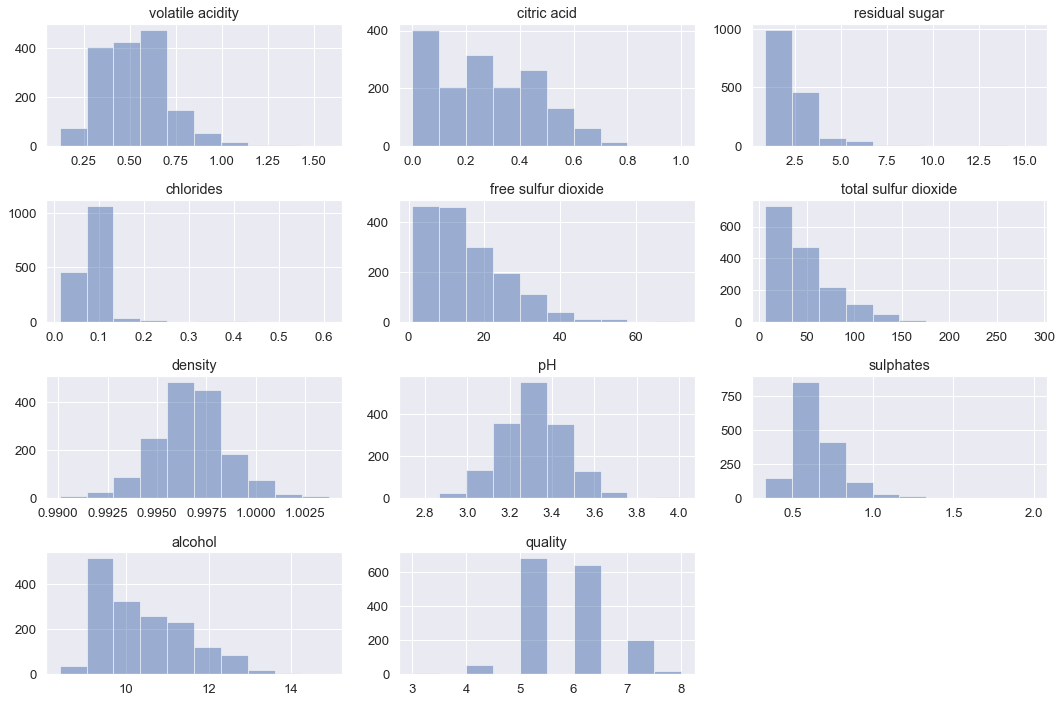

In [138]:
data.hist(alpha=0.5, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [139]:
for h in headerList:
  data[h] = pd.to_numeric(data[h], errors='coerce')

print("\nChecking for null values: \n")
data.isna().sum()

#We see there are no null values so no need to correct data


Checking for null values: 



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

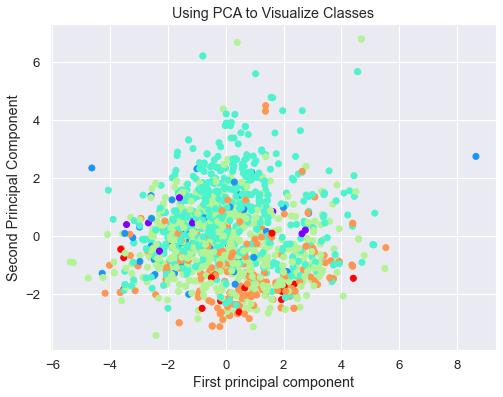

In [142]:
df_pca = data.copy()
X_pca = df_pca.loc[:, 'fixed acidity':'alcohol']
y_pca = df_pca['quality']

X_pca.tail()

#Preprocessing in preparation for PCA: Standardizing the predictor variables
X_pca = StandardScaler().fit_transform(X_pca)

#Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca)

X_pca.shape

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_pca,cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title("Using PCA to Visualize Classes")
plt.show()

# We see that even using PCA, this is a non linearly seperable problem.

<AxesSubplot:>

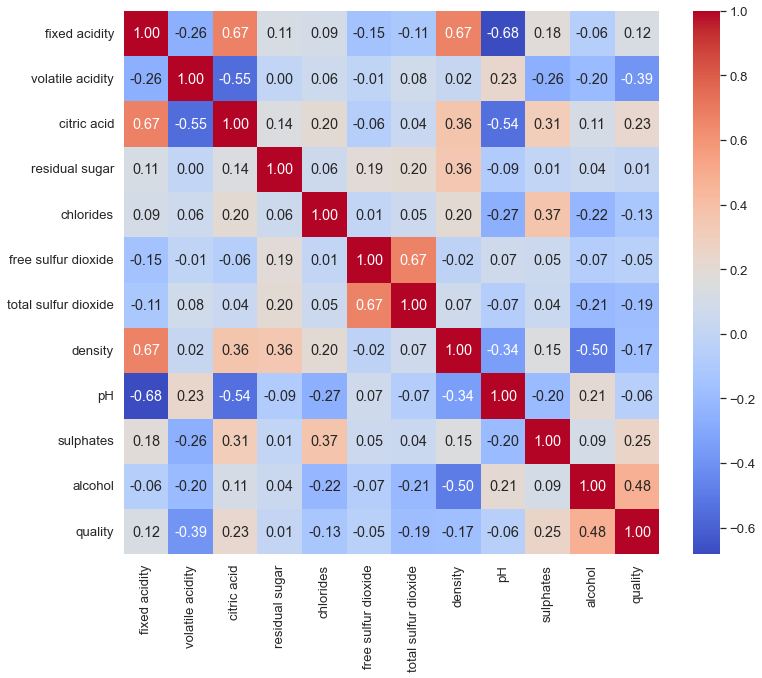

In [143]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm',fmt='.2f')

In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,random_state=200)

### KNN Classifier

Accuracy Score (K=3): 
 0.46875


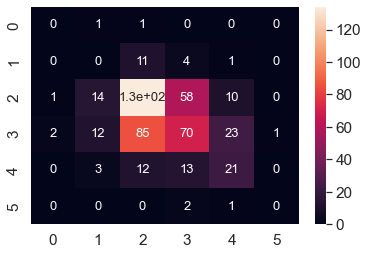

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00        16
         5.0       0.55      0.62      0.58       217
         6.0       0.48      0.36      0.41       193
         7.0       0.38      0.43      0.40        49
         8.0       0.00      0.00      0.00         3

    accuracy                           0.47       480
   macro avg       0.23      0.23      0.23       480
weighted avg       0.48      0.47      0.47       480

Accuracy Score (K=9): 
 0.51875


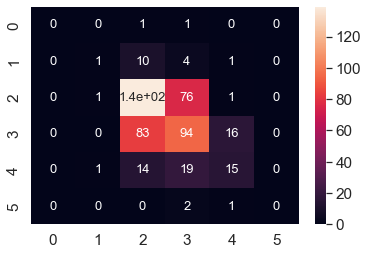

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.33      0.06      0.11        16
         5.0       0.56      0.64      0.60       217
         6.0       0.48      0.49      0.48       193
         7.0       0.44      0.31      0.36        49
         8.0       0.00      0.00      0.00         3

    accuracy                           0.52       480
   macro avg       0.30      0.25      0.26       480
weighted avg       0.50      0.52      0.51       480



/Users/davidarmstrong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/davidarmstrong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/davidarmstrong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [124]:


neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)
y_pred = neigh.predict(X_test)
score = neigh.score(X_test,Y_test)
print('Accuracy Score (K=3): \n',score)

#Plot confusion matrix
cm = confusion_matrix(Y_test, y_pred)
df_cm = pd.DataFrame(cm)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 13}) # font size
plt.show()

#Print classification report
clas = classification_report(Y_test, y_pred)
print(clas)



#Test Different Hyperparameter
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_train, Y_train)
y_pred = neigh.predict(X_test)
score = neigh.score(X_test,Y_test)
print('Accuracy Score (K=9): \n',score)

#Plot confusion matrix
cm = confusion_matrix(Y_test, y_pred)
df_cm = pd.DataFrame(cm)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 13}) # font size
plt.show()

#Print classification report
clas = classification_report(Y_test, y_pred)
print(clas)

In [125]:
#choosing kernel
for kernel in ('linear', 'poly', 'rbf', 'sigmoid'):
    #Create an svm model
    model = svm.SVC(kernel=kernel, C=10) 

    #Train the model using the training sets
    clf = model.fit(X_train, Y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    print(kernel,"Accuracy:",metrics.accuracy_score(Y_test, y_pred))

linear Accuracy: 0.6291666666666667
poly Accuracy: 0.5375
rbf Accuracy: 0.6104166666666667
sigmoid Accuracy: 0.31875


In [126]:
# tuning hyperparameters
gamma_range = np.logspace(-4,1,5)
C_range = np.linspace(1,10,10)
param_grid = dict(gamma = gamma_range,C = C_range)

grid = GridSearchCV(svm.SVC(kernel = "rbf", cache_size=5000), param_grid=param_grid, cv=10)
grid.fit(X_train, Y_train)
print("The best parameters are %s \nwith a score of %0.5f" % (grid.best_params_, grid.best_score_))

grid.score(X_test,Y_test)

/Users/davidarmstrong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


The best parameters are {'C': 1.0, 'gamma': 0.5623413251903491} 
with a score of 0.54961


0.6020833333333333

In [129]:
# Best model
model = svm.SVC(kernel='linear', gamma = 0.5623413251903491, C=1) 

#Train the model using the training sets
clf = model.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

y = clf.predict(X_test)
print('Classifier MSE: ',mean_squared_error(y,Y_test))

Accuracy: 0.6229166666666667
Classifier MSE:  0.4583333333333333


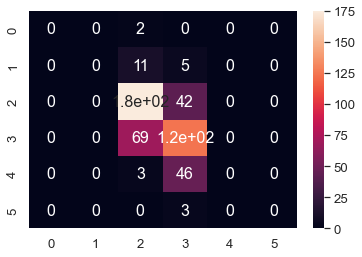

classification report: 
               precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00        16
         5.0       0.67      0.81      0.73       217
         6.0       0.56      0.64      0.60       193
         7.0       0.00      0.00      0.00        49
         8.0       0.00      0.00      0.00         3

    accuracy                           0.62       480
   macro avg       0.21      0.24      0.22       480
weighted avg       0.53      0.62      0.57       480



/Users/davidarmstrong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/davidarmstrong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/davidarmstrong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [128]:
#Plot confusion matrix
cm = confusion_matrix(Y_test, y_pred)
df_cm = pd.DataFrame(cm)
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

#Print classification report
classification = classification_report(Y_test, y_pred)
print("classification report: \n",classification)